In [1]:
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality
from sdv.evaluation.single_table import run_diagnostic
from sdv.evaluation.single_table import get_column_plot
from sdv.evaluation.single_table import get_column_pair_plot


In [2]:
real_data = pd.read_csv("test_datasets/real_data_adult.csv", index_col=0)
print(f"Test dataset has {real_data.shape[0]} instances with {real_data.shape[1]} features")

Test dataset has 200 instances with 9 features


In [3]:
real_data.head()

,Age,Workclass,Education,Occupation,Relationship,Race,Sex,Hours-per-week,Over-50K
0,39,State-gov,Bachelors,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,HS-grad,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,11th,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,Bachelors,Prof-specialty,Wife,Black,Female,40,<=50K


**Creation of Meta data**

Meta data are needed to evaluate the generated synthetic data

In [5]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real_data)

Auto detected data:



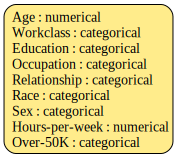

In [6]:
print('Auto detected data:\n')
metadata.visualize()

In [7]:
metadata.validate()
metadata.validate_data(data=real_data)

In [9]:
metadata.save_to_json('test_datasets/metadata_test_adult.json')

In [10]:
# in the future, we can reload the metadata object from the file
metadata = SingleTableMetadata.load_from_json('test_datasets/metadata_test_adult.json')

In [11]:
synthetic_data = pd.read_csv("test_datasets/syn_data_adult.csv", index_col=0)
print(f"Synthetic dataset has {synthetic_data.shape[0]} instances with {synthetic_data.shape[1]} features")

Synthetic dataset has 100 instances with 9 features


In [12]:
synthetic_data.head()

,Age,Workclass,Education,Occupation,Relationship,Race,Sex,Hours-per-week,Over-50K
0,17,State-gov,11th,Exec-managerial,Husband,White,Male,53,>50K
1,38,Private,Bachelors,Handlers-cleaners,Not-in-family,White,Male,68,<=50K
2,34,State-gov,9th,Handlers-cleaners,Wife,Other,Male,43,<=50K
3,43,State-gov,Bachelors,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Male,43,<=50K
4,32,State-gov,Bachelors,Handlers-cleaners,Not-in-family,White,Male,40,<=50K


In [13]:
diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...
  0%|          | 0/9 [00:00<?, ?it/s]

(3/3) Evaluating Synthesis: : 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

Diagnostic Results:

SUCCESS:
✓ The synthetic data covers over 90% of the categories present in the real data
✓ The synthetic data covers over 90% of the numerical ranges present in the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data
✓ Over 90% of the synthetic rows are not copies of the real data


In [14]:
quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:00<00:00, 75.95it/s]

Overall Quality Score: 57.49%

Properties:
- Column Shapes: 68.61%
- Column Pair Trends: 46.36%


In [15]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,Age,KSComplement,0.935
1,Workclass,TVComplement,0.410
2,Education,TVComplement,0.535
3,Occupation,TVComplement,0.420
4,Relationship,TVComplement,0.645
5,Race,TVComplement,0.705
6,Sex,TVComplement,0.900
7,Hours-per-week,KSComplement,0.690
8,Over-50K,TVComplement,0.935


In [16]:
for column in real_data.columns:
    # Generate the plot for the current column
    fig = get_column_plot(
        real_data=real_data,
        synthetic_data=synthetic_data,
        column_name=column,
        metadata=metadata
    )
    
    fig.show()

In [17]:

pairs = [['Sex', 'Relationship'], ['Age', 'Over-50K'], ['Age', 'Hours-per-week']]

for p in pairs:
    fig = get_column_pair_plot(
        real_data=real_data,
        synthetic_data=synthetic_data,
        column_names=p,
        metadata=metadata
    )

    fig.show()